In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('pcap2ipfix-applabel-yafscii.csv')
df = df.dropna()
df

,start-time,end-time,duration,rtt,proto,sip,sp,dip,dp,iflags,...,isn,risn,pkt,oct,rpkt,roct,app,entropy,rentropy,end-reason
1,5/13/24 3:59 AM,5/13/24 4:01 AM,93.334,0.019,17,192.168.50.2,51566,142.251.111.139,443,0,...,00000000,00000000,1461.0,362151,8189,9688191,51443,251,251,eof
7,5/13/24 4:00 AM,5/13/24 4:01 AM,8.497,0.018,17,192.168.50.2,54470,142.250.31.132,443,0,...,00000000,00000000,218.0,21993,1381,1710270,51443,251,251,eof
8,5/13/24 3:50 AM,5/13/24 3:50 AM,30.044,0.020,17,192.168.50.2,51587,142.251.16.106,443,0,...,00000000,00000000,322.0,55351,1403,1564258,51443,250,250,idle
10,5/13/24 4:00 AM,5/13/24 4:01 AM,9.627,0.021,17,192.168.50.2,52928,64.233.180.132,443,0,...,00000000,00000000,233.0,56599,1103,1306459,51443,250,250,eof
11,5/13/24 4:00 AM,5/13/24 4:00 AM,0.191,0.018,17,192.168.50.2,63221,142.251.163.94,443,0,...,00000000,00000000,120.0,10491,729,914118,51443,251,250,eof
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3240,5/13/24 4:01 AM,5/13/24 4:01 AM,0.000,0.000,1,192.168.50.2,0,192.168.50.1,771,0,...,00000000,00000000,1.0,56,0,0,0,0,0,eof
3242,5/13/24 3:50 AM,5/13/24 3:50 AM,0.000,0.000,6,18.165.98.63,443,192.168.50.2,51420,A,...,6d4e857e,00000000,1.0,52,0,0,0,0,0,idle
3243,5/13/24 3:57 AM,5/13/24 3:57 AM,0.000,0.000,6,17.248.228.68,443,192.168.50.2,53569,A,...,527d7abb,00000000,1.0,52,0,0,0,0,0,idle
3244,5/13/24 3:59 AM,5/13/24 3:59 AM,0.000,0.000,6,139.71.19.132,443,192.168.50.2,53592,AF,...,6965ad9d,00000000,1.0,52,0,0,0,0,0,eof


<function matplotlib.pyplot.show(close=None, block=None)>

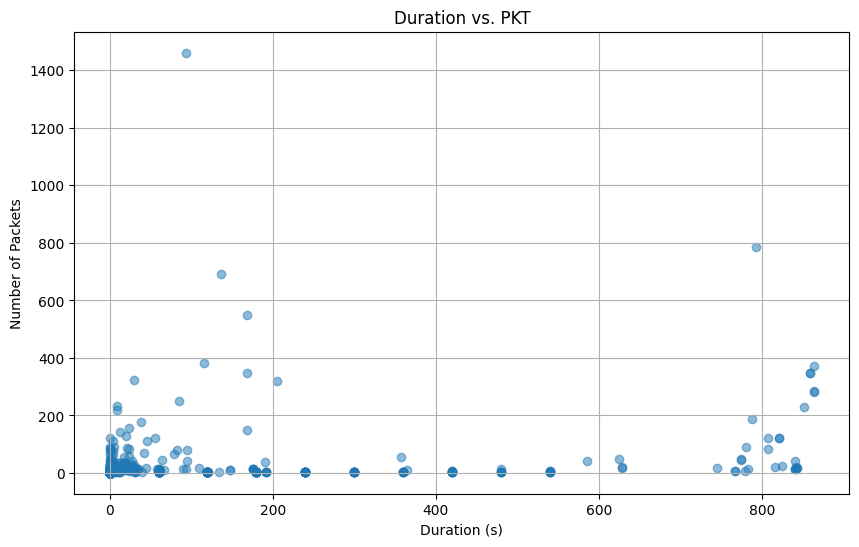

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(df['duration'], df['pkt'], alpha=0.5)
plt.xlabel('Duration (s)')
plt.ylabel('Number of Packets')
plt.title('Duration vs. PKT')
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

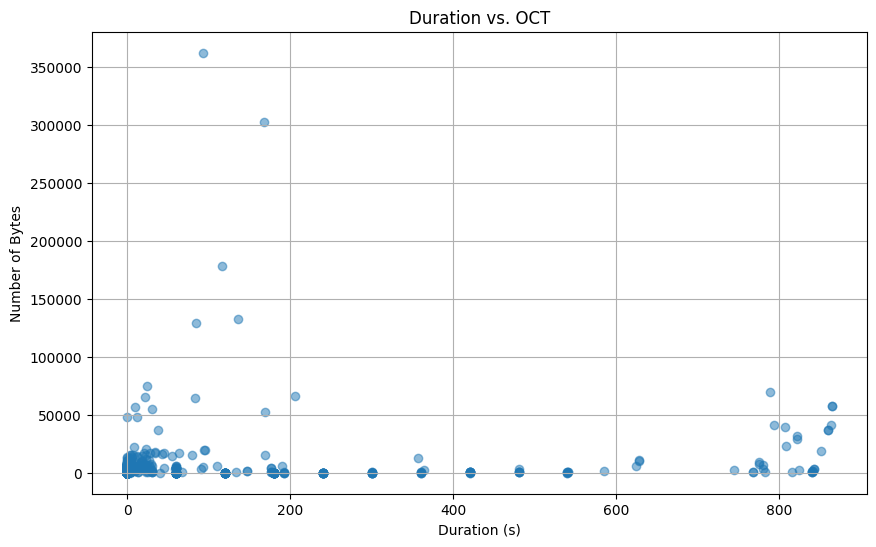

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(df['duration'], df['oct'], alpha=0.5)
plt.xlabel('Duration (s)')
plt.ylabel('Number of Bytes')
plt.title('Duration vs. OCT')
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

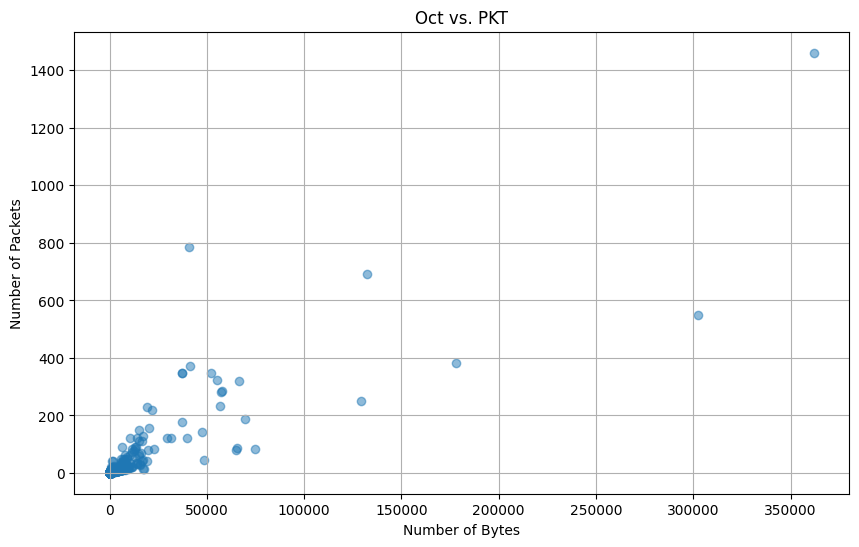

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(df['oct'], df['pkt'], alpha=0.5)
plt.xlabel('Number of Bytes')
plt.ylabel('Number of Packets')
plt.title('Oct vs. PKT')
plt.grid(True)
plt.show

In [6]:
print(df[['duration', 'rtt', 'pkt', 'oct', 'entropy', 'rpkt']].corr())

          duration       rtt       pkt       oct   entropy      rpkt
duration  1.000000  0.208351  0.298018  0.184700  0.068070  0.035520
rtt       0.208351  1.000000  0.006077 -0.000308 -0.010100 -0.000647
pkt       0.298018  0.006077  1.000000  0.865316  0.240842  0.769964
oct       0.184700 -0.000308  0.865316  1.000000  0.283689  0.731900
entropy   0.068070 -0.010100  0.240842  0.283689  1.000000  0.135971
rpkt      0.035520 -0.000647  0.769964  0.731900  0.135971  1.000000


In [7]:
# top used source ports
print(df['sp'].value_counts().head(10))

sp
0        290
5353      45
1900      14
55868      7
443        6
9999       4
52315      3
62522      2
51290      2
52725      2
Name: count, dtype: int64


In [8]:
# top used destination ports
print(df['dp'].value_counts().head(10))

dp
443      251
53       153
0        141
2048     139
5353      45
7788      13
61391     11
59525     11
64081     11
51068     11
Name: count, dtype: int64


In [9]:
top_flows = df.groupby(['sip','dip'])['pkt'].sum().sort_values(ascending=False).head(10)
print(top_flows)

sip                        dip                      
192.168.50.2               8.8.8.8                      1997.0
                           142.251.111.139              1473.0
                           162.159.61.3                  938.0
fe80::08da:b1cd:13d6:5571  fe80::14c4:9ebb:9270:4561     806.0
192.168.50.2               172.64.41.3                   639.0
                           142.251.167.113               548.0
                           142.251.167.95                496.0
                           172.253.115.101               436.0
                           64.233.180.132                377.0
                           192.168.50.170                376.0
Name: pkt, dtype: float64


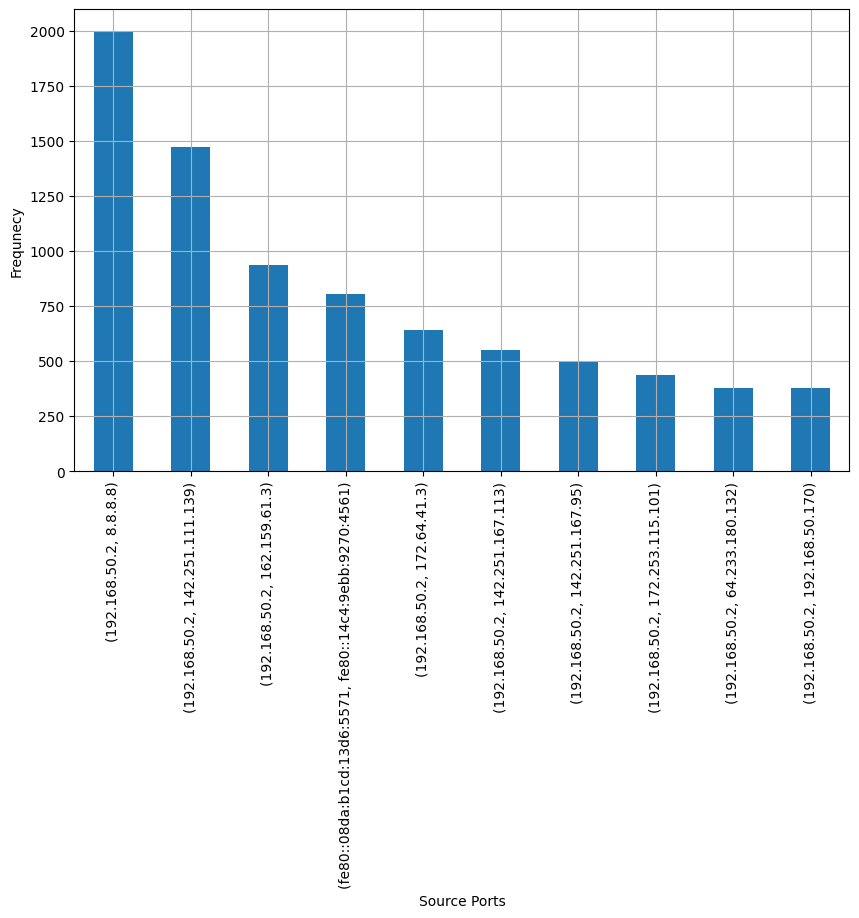

In [10]:
plt.figure(figsize=(10,6))
top_flows.plot(kind= 'bar')
plt.xlabel('Source Ports')
plt.ylabel('Frequnecy')
plt.grid(True)
plt.show()

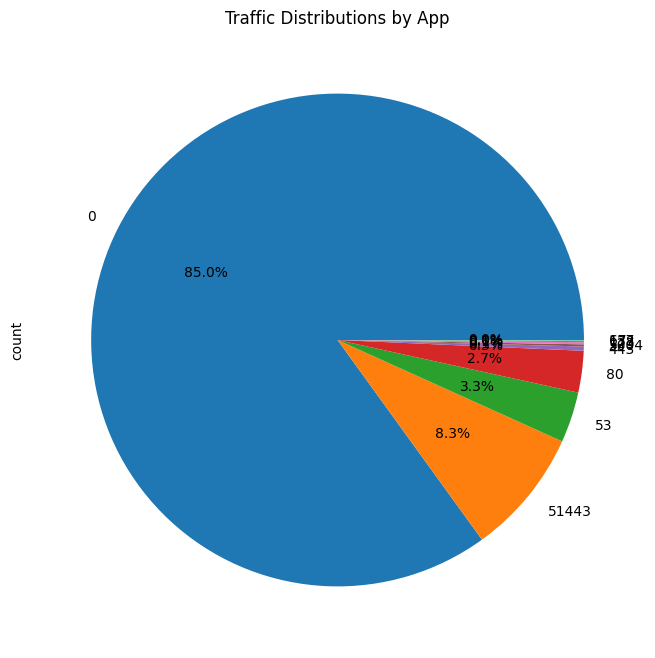

In [11]:
app_distribution = df['app'].value_counts()

plt.figure(figsize=(8,8))
app_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('Traffic Distributions by App')
plt.show()

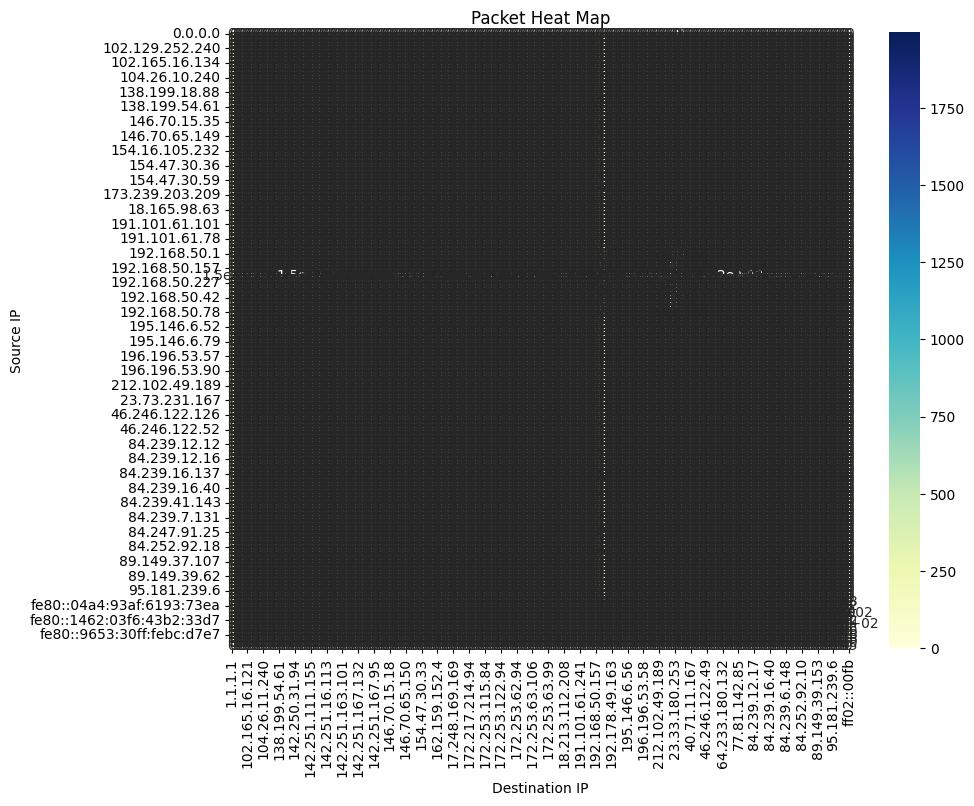

In [17]:
heatmap = df.pivot_table(index='sip', columns='dip', values= 'pkt', aggfunc='sum', fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap, annot=True, cmap="YlGnBu")
plt.title('Packet Heat Map')
plt.xlabel('Destination IP')
plt.ylabel('Source IP')
plt.show()